In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv("news_articles_cleanedv4.txt")
df.head()

,title,url,date,content,covid,news_source
0,'It took months to see the end of the tunnel':...,https://www.asiaone.com/lifestyle/it-took-mont...,5/6/2021,When she first started gymnastics at the age o...,False,Asia One
1,'Everyone watching makes me feel uneasy': Stud...,https://www.asiaone.com/singapore/everyone-wat...,1/6/2021,"These days, Natasha Osman would sit in front o...",False,Asia One
2,Singapore Mental Health Film Festival 2021 ret...,https://www.asiaone.com/lifestyle/singapore-me...,18/5/2021,The Covid-19 pandemic has heightened concerns ...,True,Asia One
3,"Woman, 19, rescued after sitting on 27th-floor...",https://www.asiaone.com/singapore/woman-19-res...,9/4/2021,Residents in Sengkang craned their necks as th...,False,Asia One
4,'I wanted to push the aircon out and jump down...,https://www.asiaone.com/lifestyle/i-wanted-pus...,9/1/2021,In his 30s and at the peak of his life and car...,False,Asia One


In [3]:
#Filter covid article

df_covid = df[df['covid']== True]
df_covid.head()

,title,url,date,content,covid,news_source
2,Singapore Mental Health Film Festival 2021 ret...,https://www.asiaone.com/lifestyle/singapore-me...,18/5/2021,The Covid-19 pandemic has heightened concerns ...,True,Asia One
9,'Right to disconnect' from work should be cons...,https://www.asiaone.com/singapore/right-discon...,1/9/2020,Working from home has become a new norm for ma...,True,Asia One
10,"Employer faces $72,000 hospital bill after mai...",https://www.asiaone.com/singapore/employer-fac...,24/8/2020,"[UPDATE: Aug 26] The employer's son, Goh Meng ...",True,Asia One
11,Domestic worker jumps from Toa Payoh flat afte...,https://www.asiaone.com/singapore/domestic-wor...,20/8/2020,A domestic helper from Myanmar jumped from the...,True,Asia One
12,Singaporeans working from home more stressed t...,https://www.asiaone.com/lifestyle/singaporeans...,19/8/2020,If there's one thing that many of us�can�agree...,True,Asia One


In [4]:
#Top 4 new sources which produce the most covid-related mental health article

df_covid = df[df['covid']== True] #filter covid article
df_covid["news_source"].value_counts()[:4]

Today Online     386
Rice Media       107
CNA              107
Straits Times     94
Name: news_source, dtype: int64

In [5]:
#Filter by year (2019,2020,2021)

df_2019 = df[df['date'].str.endswith("2019")]
df_2020 = df[df['date'].str.endswith("2020")]
df_2021 = df[df['date'].str.endswith("2021")]

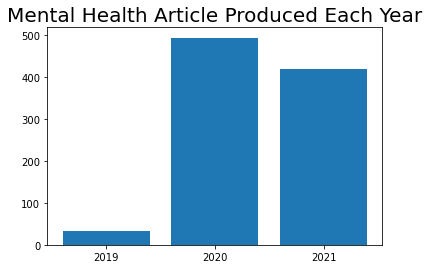

In [6]:
#Mental Health Article Produced Each Year

plt.bar(["2019", "2020", "2021"],[len(df_2019), len(df_2020), len(df_2021)])
plt.title("Mental Health Article Produced Each Year", fontsize= 20)
plt.show()

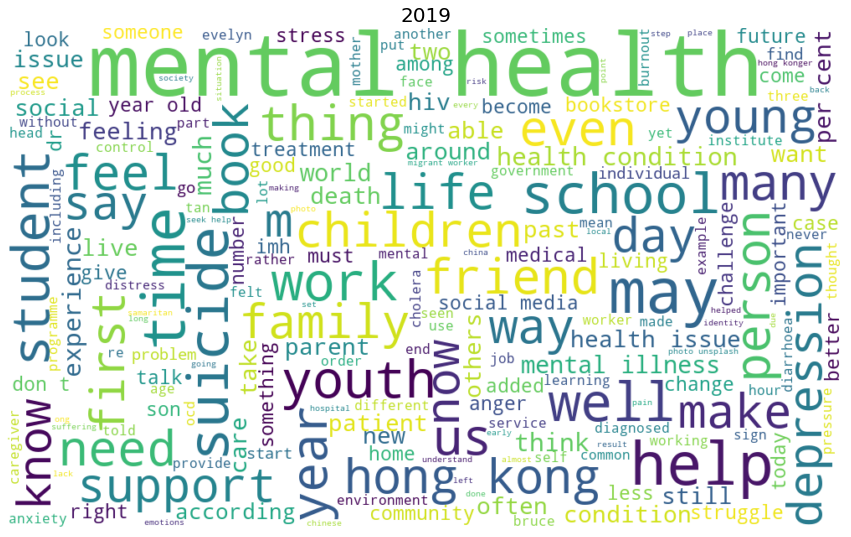

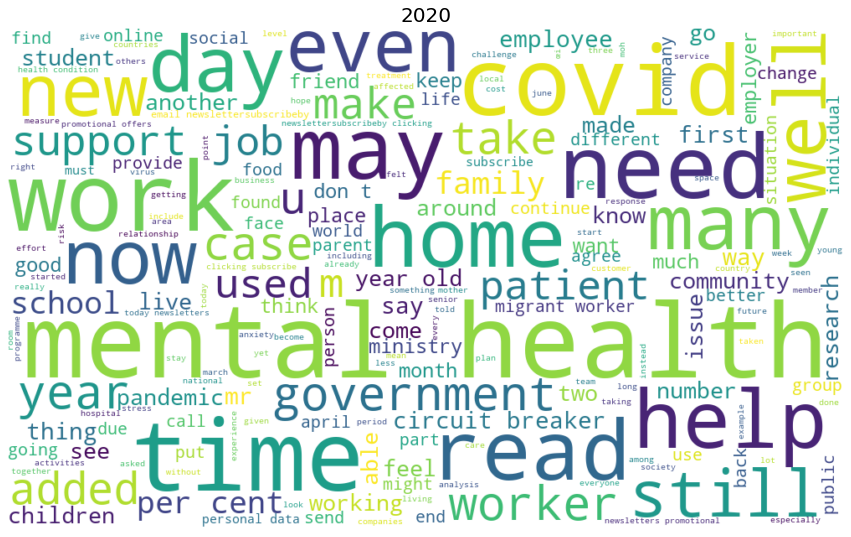

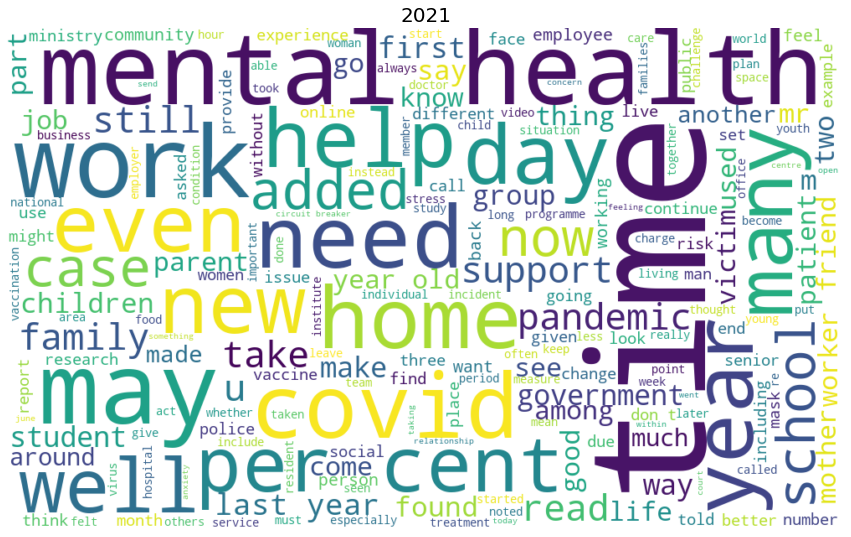

In [7]:
#Word Cloud For 2019, 2020, 2021 Article Content

article_2019 = " ".join((x for x in df_2019["content"])).lower()
article_2020 = " ".join((x for x in df_2020["content"])).lower()
article_2021 = " ".join((x for x in df_2021["content"])).lower()

stopword1 = STOPWORDS
stopword1 = stopword1.union(["s", "â", "singapore", "singaporeans","sâ", 'said', "will", "one", "people"])


wc = WordCloud(background_color = 'white', stopwords = stopword1, height = 600, width = 1000)

#2019
wc.generate(article_2019)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.title("2019", fontsize= 20)
plt.axis('off')
plt.show()

wc.generate(article_2020)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.title("2020", fontsize= 20)
plt.axis('off')
plt.show()

wc.generate(article_2021)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.title("2021", fontsize= 20)
plt.axis('off')
plt.show()

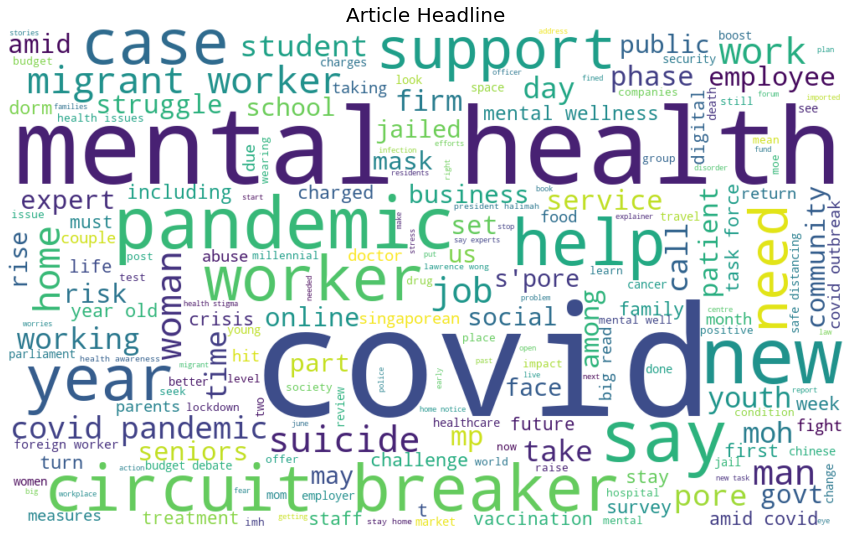

In [8]:
#Word Cloud For Headline

headline = " ".join((x for x in df_covid["title"]))
headline = headline.lower()
stopword2 = STOPWORDS
stopword2 = stopword1.union(["s", "â", "singapore", "singaporeans", "commentary","cna", "sâ"])

wc = WordCloud(background_color = 'white', stopwords = stopword2, height = 600, width = 1000)
wc.generate(headline)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.title("Article Headline", fontsize= 20)
plt.axis('off')
plt.show()

In [9]:
#Word Cloud for COVID & Non-COVID Article

df_non_covid = df[df['covid']== False]

covid = " ".join((x for x in df_covid["content"])).lower()
non_covid = " ".join((x for x in df_non_covid["content"])).lower()

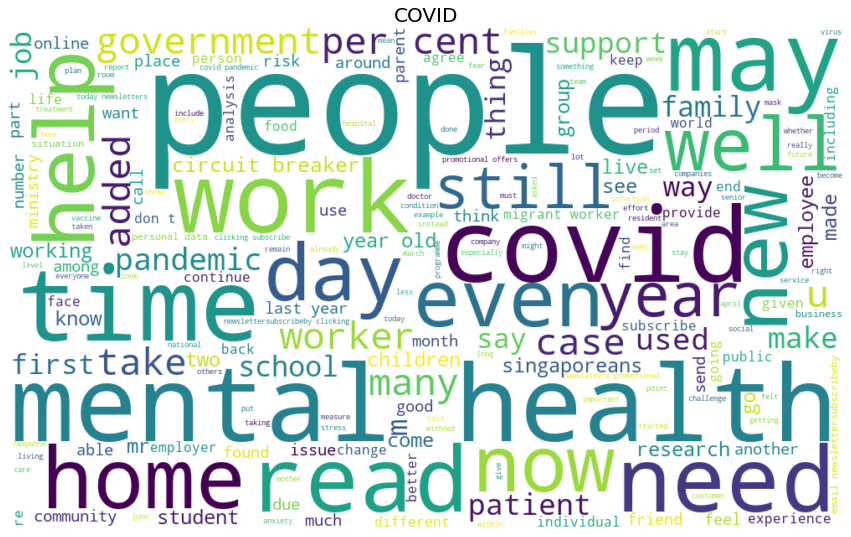

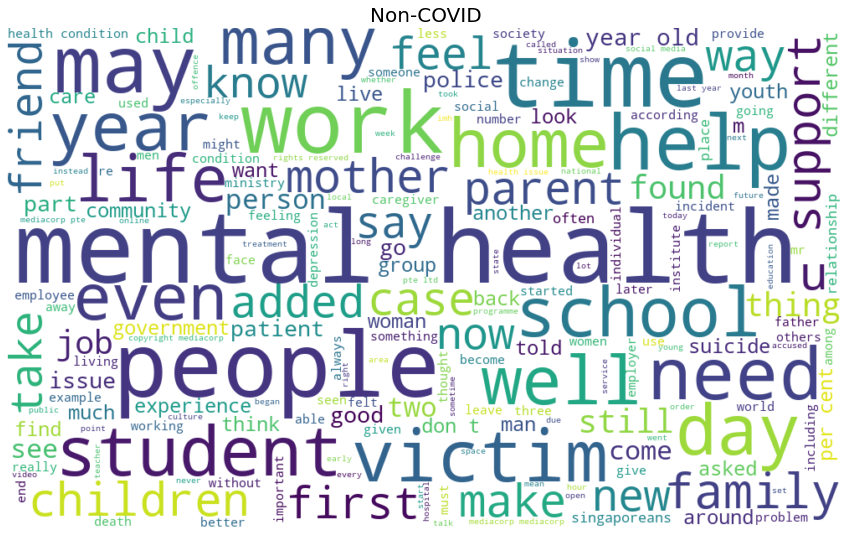

In [10]:
stopword3 = STOPWORDS
stopword3 = stopword3.union(["s","â","singapore","singaporean","sâ", "will", "said","one"])


wc = WordCloud(background_color = 'white', stopwords = stopword3, height = 600, width = 1000)

#COVID
wc.generate(covid)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.title("COVID", fontsize= 20)
plt.axis('off')
plt.show()

#Non COVID
wc.generate(non_covid)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.title("Non-COVID", fontsize= 20)
plt.axis('off')
plt.show()